In [2]:
!c:\python27\python.exe -m pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 20.2.4
    Uninstalling pip-20.2.4:
      Successfully uninstalled pip-20.2.4


DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.


In [1]:
!pip install scikit-learn

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
You should consider upgrading via the 'c:\python27\python.exe -m pip install --upgrade pip' command.


In [78]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 통계적 모형(선형회귀)
import statsmodels.api as sm

# 머신러닝 관련
# pip install scikit-learn
from sklearn import datasets
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

# 자전거 대여
- 예측 모델

# 타이타닉
- 분류 모델

In [4]:
boston =datasets.load_boston()

In [6]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [10]:
x = boston.data
y = boston.target #반응변수

#pd.DataFrame(y, columns=['label'])
#pd.DataFrame(x, columns=boston.feature_names)
boston_raw_data = pd.concat([pd.DataFrame(y, columns=['label']), pd.DataFrame(x, columns=boston.feature_names)], axis=1)

In [11]:
boston_raw_data

,label,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1234, test_size=0.2)

In [32]:
boston_linear_fit = LinearRegression(fit_intercept=False, normalize=True).fit(x_train, y_train)

In [34]:
boston_linear_fit.coef_

array([-7.47115496e-02,  6.11374807e-02,  8.15478667e-04,  3.08614506e+00,
       -2.06295086e+00,  5.44931662e+00, -7.75151505e-03, -9.91325319e-01,
        1.56308765e-01, -8.96483291e-03, -3.10435819e-01,  1.69123290e-02,
       -4.09734001e-01])

In [45]:
boston_ridge_fit = Ridge(alpha=0.5, fit_intercept=False, normalize=True, random_state=1234).fit(x_train, y_train)

In [47]:
pd.DataFrame(boston_ridge_fit.coef_, columns=['alpha'])

,alpha
0,-0.074601
1,0.061390
2,-0.001869
3,3.026139
4,-1.539627
5,5.416677
6,-0.008023
7,-0.985832
8,0.156767
9,-0.009076


In [72]:
# alpha 회귀계수 살펴보기
# alpha 후보 뽑기
result_ridge = pd.DataFrame()
alphas = np.logspace(-2, 1, 4)
for alpha in alphas:
    boston_ridge_fit = Ridge(alpha=alpha, fit_intercept=False, normalize=True, random_state=1234).fit(x_train, y_train)
    result_coef = pd.DataFrame(boston_ridge_fit.coef_, columns=['alpha={}'.format(alpha)])
    result_ridge = pd.concat([result_ridge, result_coef], axis=1)

In [73]:
result_ridge

,alpha=0.01,alpha=0.1,alpha=1.0,alpha=10.0
0,-0.074709,-0.074684,-0.074538,-0.074355
1,0.061143,0.061193,0.061602,0.064244
2,0.000744,0.000144,-0.003428,-0.004461
3,3.084891,3.073721,2.970313,2.271127
4,-2.049563,-1.935602,-1.207010,-0.072463
5,5.448524,5.441705,5.393125,5.194945
6,-0.007760,-0.007829,-0.008100,-0.004790
7,-0.991196,-0.990072,-0.981635,-0.938687
8,0.156319,0.156410,0.157139,0.160148
9,-0.008968,-0.008991,-0.009152,-0.009539


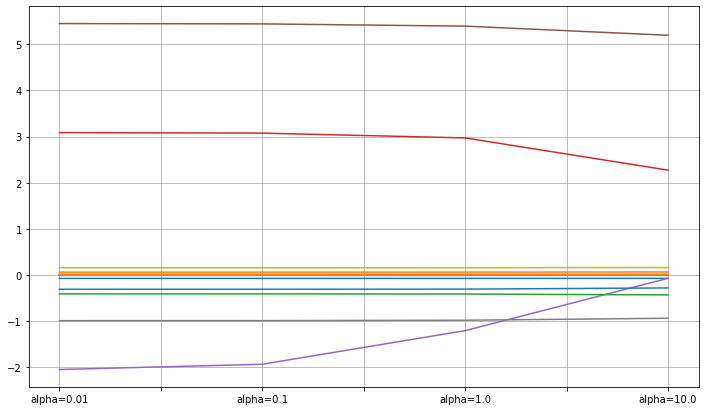

In [74]:
result_ridge.T.plot(figsize=(12,7), legend=False)
plt.grid()
plt.show()

In [76]:
alphas = np.logspace(-2, 2, 10)
for alpha in alphas:
    bostion_ridge_fit = Ridge(alpha = alpha, fit_intercept=False, normalize=True, random_state=1234).fit(x_train, y_train)
    print('score: {}'.format(boston_ridge_fit.score(x_train, y_train)))

score: 0.6804633396045883
score: 0.6804633396045883
score: 0.6804633396045883
score: 0.6804633396045883
score: 0.6804633396045883
score: 0.6804633396045883
score: 0.6804633396045883
score: 0.6804633396045883
score: 0.6804633396045883
score: 0.6804633396045883


In [ ]:
# next-time
alphas = np.logspace(-2, 1, 10)
prameters = {'alpha': alphas}
result_ridge = GridSearchCV(Ridge, parameters, scoring='mean_squared_error', CV=5)
result_ridge.fit(x_train, y_train)
result_ridge.best_params_

In [39]:
boston_lasso_fit = Lasso(alpha=0.5, fit_intercept=False, normalize=True, random_state=1234).fit(x_train, y_train)

In [40]:
boston_lasso_fit.coef_

array([-0.05509869,  0.0626307 ,  0.        ,  0.        ,  0.        ,
        4.55069785,  0.01330543, -0.61087744,  0.1220884 , -0.00816934,
       -0.17814808,  0.01746922, -0.47874806])

In [69]:
result_lasso = pd.DataFrame()
alphas = np.logspace(-2, 1, 4)
for alpha in alphas:
    boston_lasso_fit = Lasso(alpha=alpha, fit_intercept=False, normalize=True, random_state=1234).fit(x_train, y_train)
    result_coef = pd.DataFrame(boston_lasso_fit.coef_, columns=['aplhpa={}'.format(alpha)])
    result_lasso = pd.concat([result_lasso, result_coef], axis=1)

In [70]:
result_lasso

,aplhpa=0.01,aplhpa=0.1,aplhpa=1.0,aplhpa=10.0
0,-0.073886,-0.071567,-0.031101,-0.000000
1,0.061658,0.062226,0.063360,0.118478
2,-0.009410,0.000000,0.000000,-0.000000
3,2.915335,1.590914,0.000000,0.000000
4,-0.000000,-0.000000,0.000000,0.000000
5,5.338783,5.226220,3.596621,0.000000
6,-0.009311,-0.004070,0.034584,0.060735
7,-0.968994,-0.904076,-0.208051,0.000000
8,0.157491,0.157522,0.067744,0.000000
9,-0.009396,-0.009688,-0.005654,0.006064


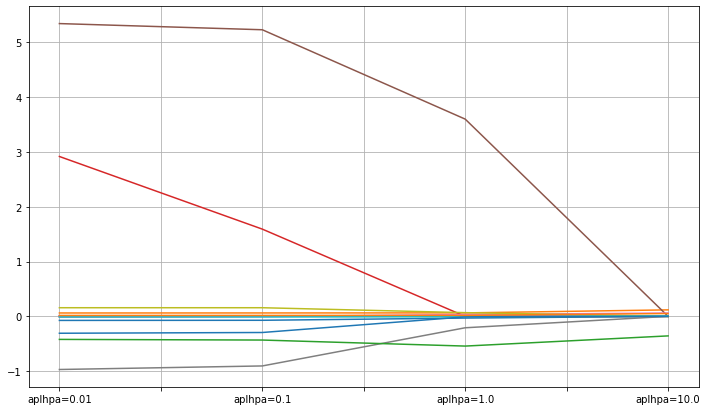

In [71]:
result_lasso.T.plot(figsize=(12,7), legend=False)
plt.grid()
plt.show()

In [77]:
alphas = np.logspace(-2, 2, 10)
for alpha in alphas:
    bostion_lasso_fit = Ridge(alpha = alpha, fit_intercept=False, normalize=True, random_state=1234).fit(x_train, y_train)
    print('score: {}'.format(boston_lasso_fit.score(x_train, y_train)))

score: 0.2946262963926738
score: 0.2946262963926738
score: 0.2946262963926738
score: 0.2946262963926738
score: 0.2946262963926738
score: 0.2946262963926738
score: 0.2946262963926738
score: 0.2946262963926738
score: 0.2946262963926738
score: 0.2946262963926738
